In [1]:
from pylab import rcParams
from osgeo import gdal
import mpl_toolkits.basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# import numpy as np
import random as random
# import matplotlib.pyplot as plt
import time
import pandas as pd
import math
from scipy.spatial import distance#
from pyproj import Proj,transform
import seaborn as sns
import copy
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import multiprocessing
# from matplotlib import animation
# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt
# import numpy as np
%matplotlib inline
rcParams['figure.figsize'] = (8,6)

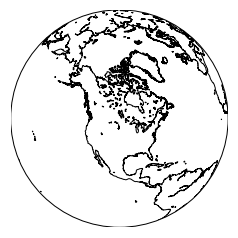

In [2]:

 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
 
plt.show()

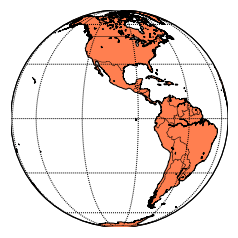

In [3]:
my_map = Basemap(projection='ortho', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

plt.show()

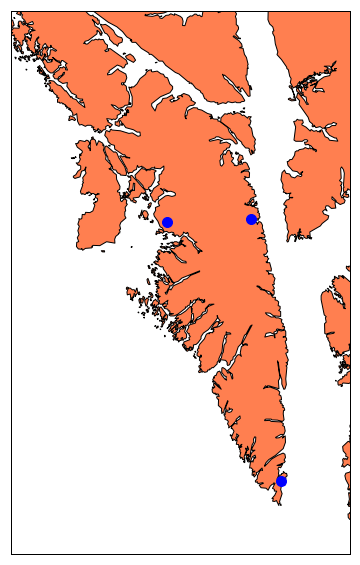

In [4]:
plt.figure(figsize = (10,10))
my_map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-136.25, llcrnrlat=56.0,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'coral')
my_map.drawmapboundary()
 
lons = [-135.3318, -134.8331, -134.6572]
lats = [57.0799, 57.0894, 56.2399]
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=10)
 
plt.show()

# Bangladesh

In [5]:
Data=pd.read_csv("cases.csv",sep = ',', header = 0)

In [6]:
Data

,Start,End,where,country,Recovered,Deaths,Total Cases,Lat,Long
0,09/1998,04/1999,Perak,M,160,105,265,4.592113,101.090109
1,09/1998,04/1999,selangor,M,160,105,265,3.073838,101.518347
2,09/1998,04/1999,Negeri Sembilan,M,160,105,265,2.725806,101.942378
3,03/1999,04/1999,Singapore,S,10,1,11,1.352083,103.819836
4,02/2001,03/2001,Siliguri,I,21,45,66,26.727101,88.395286
5,04/2001,05/2001,Meherpur,B,4,9,13,23.805199,88.672358
6,01/2003,02/2003,Naogaon,B,4,8,12,24.913160,88.753095
7,01/2004,02/2004,Goalando,B,7,22,29,23.684042,89.699655
8,04/2004,05/2004,Faridpur,B,9,27,36,23.542392,89.630892
9,01/2005,03/2005,Tangail,B,1,11,12,24.251345,89.916710


In [7]:
lons_india = Data['Long'][Data['country'] == 'I'].values
lats_india =Data['Lat'][Data['country'] == 'I'].values
lons_ban = Data['Long'][Data['country'] == 'B'].values
lats_ban =Data['Lat'][Data['country'] == 'B'].values

In [8]:
Data['Long'][Data['country'] == 'I'].values

array([88.395286, 88.556531, 88.734965, 88.422346, 78.96288 , 88.950364,
       88.422346, 88.422346, 88.422346, 89.094494, 88.422346, 75.78041 ])

In [9]:
# int(float(Data['Start'].values[0].split('/')[0]))
months = []
years = []
monthe = []
yeare = []
for i in range(len(Data)):
    months.append(int(float(Data['Start'].values[i].split('/')[0])))
    years.append(int(float(Data['Start'].values[i].split('/')[1])))
    monthe.append(int(float(Data['End'].values[i].split('/')[0])))
    yeare.append(int(float(Data['End'].values[i].split('/')[1])))

In [10]:
Data['Sm'] = months
Data['Sy'] = years
Data['Em'] = monthe
Data['Ey'] = yeare

In [11]:
# plt.figure(figsize = (10,10))
# my_map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
#     resolution = 'h', area_thresh = 0.05,
#     llcrnrlon=70, llcrnrlat=7.0,
#     urcrnrlon=93, urcrnrlat=27.75)
 
# my_map.drawcoastlines()
# my_map.drawcountries()
# my_map.fillcontinents(color = 'lightblue')
# my_map.drawmapboundary()
 
# # lons = [-135.3318, -134.8331, -134.6572]
# # lats = [57.0799, 57.0894, 56.2399]
# x,y = my_map(lons, lats)
# my_map.plot(x, y, 'bo', markersize=6)
 
# plt.show()

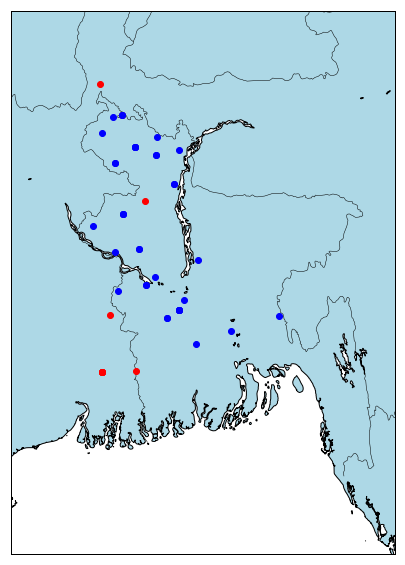

In [12]:
plt.figure(figsize = (10,10))
my_map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.05,
    llcrnrlon=87, llcrnrlat=20.0,
    urcrnrlon=93, urcrnrlat=27.75)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'lightblue')
my_map.drawmapboundary()
 
# lons = [-135.3318, -134.8331, -134.6572]
# lats = [57.0799, 57.0894, 56.2399]
# xcoord[Case[2]], ycoord[Case[2]]
x_i,y_i = my_map(lons_india, lats_india)
my_map.plot(x_i, y_i, 'o', color = 'red', markersize=6)

# my_map.plot(my_map(xcoord[Case[25]], ycoord[Case[25]])[0],my_map(xcoord[Case[25]], ycoord[Case[25]])[1] , 'bo', markersize=6, color = 'red')
x_b,y_b = my_map(lons_ban, lats_ban)
my_map.plot(x_b, y_b, 'bo', markersize=6)
 
plt.show()

In [13]:
Case[25]

NameError: name 'Case' is not defined

In [14]:
xcoord = Data['Long'].values
ycoord= Data['Lat'].values

In [15]:
Case = []
# infect = []
# culled = []

# # #appends each day (so that the classes can be colour coordinated)
for year in range(1999, max(Data['Ey'])+1):
    for month in range(1,13):
#         print(month)
        c = []
        for k in Data[Data['Sy'] == year].index.values:
#             print(k)
#             print(Data.loc[k]['Em'], month, Data.loc[k]['Sm'])
            if Data.loc[k]['Em']>=month>=Data.loc[k]['Sm']:
                
                print(k)
                c.append(k)
        Case.append(c)
#         infect.append(InP[InP['Time of Infection']<=i])
#         culled.append(InP[InP['Time of Culling']<=i])

3
3
4
4
5
5
6
6
7
7
8
8
9
9
9
10
10
11
11
12
12
13
14
13
14
15
16
15
16
17
18
19
20
17
18
19
20
21
22
23
24
21
22
23
24
25
26
27
28
29
30
25
26
27
28
29
30
31
31
32
33
34
35
36
32
33
34
35
36
32
33
34
35
36
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
49
50
51
52
53
54
55
55


In [ ]:
Data

(date2.year - date1.year) * 12 + (date2.month - date1.month)

In [ ]:
[(i % 12)+1 for i in range(0,240)]
[1999+int(i/12) for i in range(0,240)]

KeyboardInterrupt: 

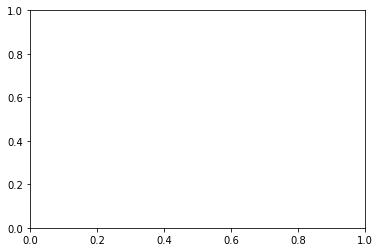

In [16]:
# fig = plt.figure()
# All suscpetible farms initally
# ax = plt.axes(xlim=(min(xcoord), max(xcoord)), 
#               ylim=(min(ycoord), max(ycoord)))
# x_i,y_i = my_map(lons_india, lats_india)
# my_map.plot(x_i, y_i, 'bo', markersize=6, color = 'red')
# x_b,y_b = my_map(lons_ban, lats_ban)
# my_map.plot(x_b, y_b, 'bo', markersize=6)
fig = plt.figure()

ax = fig.add_subplot(111)
my_map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.05,
    llcrnrlon=87, llcrnrlat=20.0,
    urcrnrlon=93, urcrnrlat=27.75)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'lightblue')
my_map.drawmapboundary()
# ax.plot(xcoord, ycoord, 'o',color = 'yellowgreen', ms =4, alpha=.2, label = 'Suscpetible farms')
line1, = my_map.plot([], [], 'bo', markersize=6, color = 'red')
# line2,  = ax.plot([], [], 'o', color = 'r',ms =4, alpha = 0.6, label = 'Infected farms')
# # line3,  = ax.plot([], [], 'o', color = 'yellowgreen', ms=6, alpha = 0.2, label = 'Susceptible farms')
# line4,  = ax.plot([], [], 'o', color = 'b', ms=4, alpha = 0.3, label = 'Naturally immune farms')
# line5,  = ax.plot([], [], 'o', color = 'grey',ms=4, alpha = 1, label = 'Vaccined farms')
time_text = ax.text(0.05, 1.05, '', transform=ax.transAxes, color = 'k', fontsize = 30)
# ax.text(0.5, 1.0, "MATPLOTLIB ", transform=ax.transAxes,
#         ha="right", va="bottom", color="w",
#         family="sans-serif", fontweight="light", fontsize=16)

# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
#     line2.set_data([],[])
#     line4.set_data([],[])
#     line5.set_data([],[])
    time_text.set_text('')
    return line1, 

# animation function of dataframes' list
def animate(i):
#     my_map.plot(x_i, y_i, 'bo', markersize=6, color = 'red')
    line1.set_data(my_map(xcoord[Case[i]], ycoord[Case[i]])[0],my_map(xcoord[Case[i]], ycoord[Case[i]])[1])
    time_text.set_text('Year {}, Month {}'.format(1999+int(i/12), (i % 12)+1))

    return line1, time_text

# call the animator, frames*(1/fps) is the speed of the animation.
# set number of frames to the length of your list of dataframes
anim = animation.FuncAnimation(fig, animate, frames=len(Case), init_func=init, interval=20, blit=True)
# plt.legend(bbox_to_anchor=(1.2, 0),
#            ncol = 2, fontsize = 16, markerscale=4)
plt.xticks([])
plt.yticks([])
# plt.title('Cumbria')
# plt.xlabel('X coordinate (m)')
# plt.ylabel('Y coordiante (m)')
anim.save('Case.mp4', fps=8)

In [ ]:
xcoord[Case[2]], ycoord[Case[2]]

In [116]:
from osgeo import gdal, osr

Raster Projection:
 GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]
Raster GeoTransform:
 (88.00824071591252, 0.0008332999999999994, 0.0, 26.634571572088376, 0.0, -0.0008332999999999992)


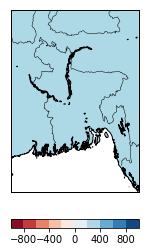

In [18]:
pathToRaster =r'../Downloads/BGD_ppp_2010_adj_v2/BGD_ppp_2010_adj_v2.tif'
raster = gdal.Open(pathToRaster, gdal.GA_ReadOnly)
array = raster.GetRasterBand(1).ReadAsArray()
msk_array = np.ma.masked_equal(array, value = 65535)
print('Raster Projection:\n', raster.GetProjection())
print('Raster GeoTransform:\n', raster.GetGeoTransform())

# Project raster image using Basemap and the basemap.interp function
# map = Basemap(projection='robin',resolution='c',lat_0=0,lon_0=0)
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.05,
    llcrnrlon=87, llcrnrlat=20.0,
    urcrnrlon=93, urcrnrlat=27.75)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'lightblue')
map.drawmapboundary()

datain = msk_array 

ny, nx = datain.shape

xin = np.linspace(map.xmin,map.xmax,nx) # nx is the number of x points on the grid
yin = np.linspace(map.ymin,map.ymax,ny) # ny in the number of y points on the grid
# xin = np.linspace(map.xmin,map.xmax,nx) # nx is the number of x points on the grid
# yin = np.linspace(map.ymin,map.ymax,ny) # ny in the number of y points on the grid

lons = np.arange(88.00824071591252,
 93,
 0.25)
lats = np.arange( 26.634571572088376,
 28,
 0.25)
# lons = np.arange(-180,180,0.25) #from raster.GetGeoTransform()
# lats  = np.arange(-90,90,0.25) 

lons, lats = np.meshgrid(lons,lats) 
xout,yout = map(lons, lats)
dataout = mpl_toolkits.basemap.interp(datain, xin, yin, xout, yout, order=1)

levels = [-1000,-800,-600,-400,-200,0,200,400,600,800,1000]
cntr = map.contourf(xout,yout,dataout, levels,cmap='RdBu')
cbar = map.colorbar(cntr,location='bottom',pad='15%')

# Add some more info to the map
# cstl = map.drawcoastlines(linewidth=.5)
# meri = map.drawmeridians(np.arange(0,360,60), linewidth=.2, labels=[1,0,0,1], labelstyle='+/-', color='grey' ) 
# para = map.drawparallels(np.arange(-90,90,30), linewidth=.2, labels=[1,0,0,1], labelstyle='+/-', color='grey')
# boun = map.drawmapboundary(linewidth=0.5, color='grey')

In [ ]:
dataout

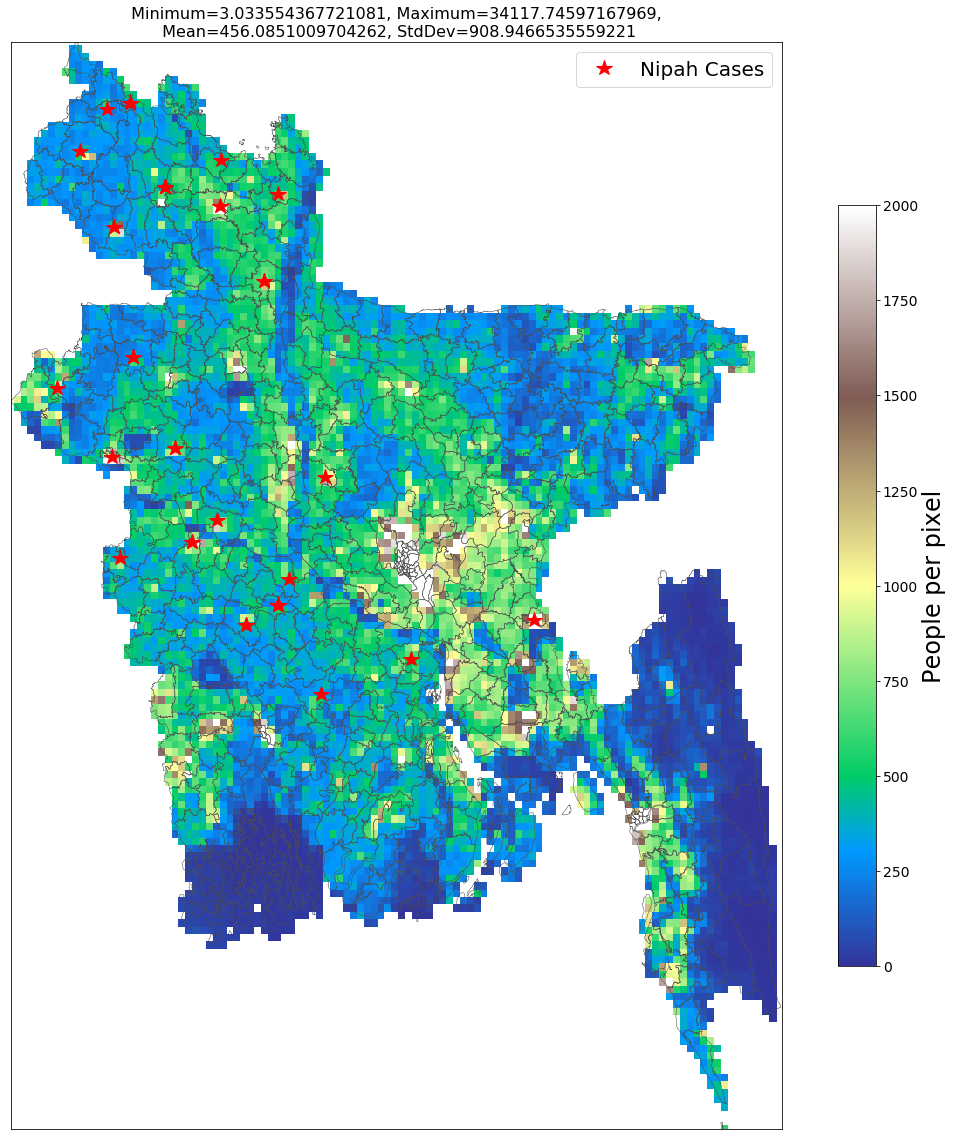

In [330]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)
# pathToRaster =r'../Downloads/BGD_ppp_2010_adj_v2/BGD_ppp_2010_adj_v2.tif'
# pathToRaster =r'../Downloads/BGD_ppp_2010_adj_v2/BGD_ppp_UTM44.bil'

pathToRaster =r'../Downloads/BGD_ppp_2010_adj_v2/output_r5_ac.tif'
# # raster = gdal.Open(pathToRaster, gdal.GA_ReadOnly)
# # Plotting 2070 projected August (8) precip from worldclim
gdata = gdal.Open(pathToRaster)


# gdata = ds
geo = gdata.GetGeoTransform()
# data = gdata.ReadAsArray()
data = gdata.GetRasterBand(1).ReadAsArray()
xres = geo[1]
yres = geo[5]

# A good LCC projection for USA plots
m =Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.05,
    llcrnrlon=88.0082, llcrnrlat=20.5945716,
    urcrnrlon=92.6882407, urcrnrlat=26.6345716)

# This just plots the shapefile -- it has already been clipped
m.readshapefile(r'../Downloads/bgd_border/bgd_admbnda_adm3_bbs_20180410','boundaries',drawbounds=True, color='0.3')

xmin = geo[0] + xres * 0.5
xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
ymax = geo[3] - yres * 0.5

x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
x,y = m(x,y)

cmap = plt.cm.terrain

cmap.set_under ('1.0')
cmap.set_bad('0.8')

# im = m.pcolormesh(x,y, data.T, cmap=cmap, vmin=0, vmax=100)
im = m.pcolormesh(x,y, (data.T)*50, cmap=cmap, vmin = 0, vmax = 2000)

cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)
cb.ax.tick_params(labelsize=14)
cb.set_label(r"People per pixel", size=24)

band = gdata.GetRasterBand(1)
stats = band.ComputeStatistics(0)
stats=[x*50 for x in stats]
plt.title(" Minimum={}, Maximum={}, \n Mean={}, StdDev={}".format( stats[0], stats[1], stats[2], stats[3] ), fontsize = 16)
# x_i,y_i = m(xx[maxi[0]],yy[maxi[1]])
# m.plot(x_i, y_i, 'o', color = 'red', markersize=16)
# plt.colorbar()
# plt.title('August Precip (mm)')
x_b,y_b = m(lons_ban, lats_ban)
m.plot(x_b, y_b, marker = '*', markersize=16, color = 'red', linestyle ='', label ='Nipah Cases')
plt.legend(loc = 'upper right', fontsize = 20)
plt.show()

In [323]:
Matrix = gdata.ReadAsArray() #yx
index = np.argwhere(Matrix>0)

In [324]:
xx= np.arange(xmin, xmax+xres, xres)
# [xmin:xmax+xres:xres]
yy = np.arange( ymax+yres, ymin,yres)


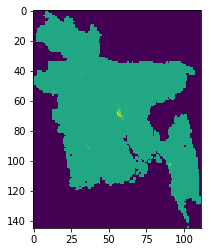

In [325]:
plt.imshow(Matrix)

In [133]:
srs = osr.SpatialReference()
srs.ImportFromWkt(gdata.GetProjection())

srsLatLong = srs.CloneGeogCS()
ct = osr.CoordinateTransformation(srs,srsLatLong)
print( ct.TransformPoint(originX,originY))

(88.00824071591252, 26.634571572088376, 0.0)


In [206]:
# stats = data.GetStatistics( True, True )
# print( "[ STATS ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % ( \
#                 stats[0], stats[1], stats[2], stats[3] ))


AttributeError: 'numpy.ndarray' object has no attribute 'GetStatistics'

In [61]:
# np.max(data.T[data.T>0])
np.min(data[data>0])

0.02056689

In [ ]:
from raster2xyz.raster2xyz import Raster2xyz

# input_raster = "input_raster.tif"
# out_csv = "/tmp/out_xyz.csv"

# rtxyz = Raster2xyz()
# rtxyz.translate(input_raster, out_csv)


In [ ]:
from raster2xyz.raster2xyz import Raster2xyz

input_raster = "Boundaries/0000.tif"
out_csv = "Boundaries_FILES/0000.csv"

rtxyz = Raster2xyz()
rtxyz.translate(input_raster, out_csv)
# ds = gdal.Open("Boundaries/0000.tif")
# myarray = np.array(ds.GetRasterBand(1).ReadAsArray())


In [ ]:
df = pd.read_csv("Boundaries_FILES/0000.csv", header = 0)
df.rename(columns={'x': 'long', 'y': 'lat'}, inplace=True)

In [ ]:
df

In [ ]:
df['z'] = df['z'].replace(-999.0, 0)

In [ ]:
sum(df['z'])

In [20]:
def downsample_output ( g, fname_out, hires_data ):
    """This function downsamples, using the **mode**, the 2D array
    `hires_data`. The datatype is assumed byte in this case, and
    you might want to change that. The output files are given by
    `fname_out`, and we downsample by a factor of 100 and 300. The
    initial GDAL dataset is `g` (this is where the data are coming
    from, and we use that to fish out the resolution, geotransform,
    etc.).

    NOTE that this is fairly specialised a function, and you might
    want to have more flexiblity by adding options to deal with
    the aggregation procedure in `gdal.RegenerateOverviews`, the
    resolutions of the aggregations you want, the datatypes, etc.
    """
    # Create an in-memory GDAL dataset to store the full resolution
    # dataset...
    total_obs = g.RasterCount
    drv = gdal.GetDriverByName( "MEM" )
    dst_ds = drv.Create("", g.RasterXSize, g.RasterYSize, 1, \
      gdal.GDT_Byte )
    dst_ds.SetGeoTransform( g.GetGeoTransform())
    dst_ds.SetProjection ( g.GetProjectionRef() )
    dst_ds.GetRasterBand(1).WriteArray ( hires_data )

    geoT = g.GetGeoTransform()
    drv = gdal.GetDriverByName( "GTiff" )
    resampled_3k = drv.Create( "%s_3k.tif" % fname_out, \
      g.RasterXSize/100, g.RasterYSize/100, 1, gdal.GDT_Byte )
    resampled_9k = drv.Create( "%s_9k.tif" % fname_out, \
      g.RasterXSize/300, g.RasterYSize/300, 1, gdal.GDT_Byte )

    this_geoT = ( geoT[0], geoT[1]*300, geoT[2], geoT[3], \
          geoT[4], geoT[5]*300 )
    resampled_9k.SetGeoTransform( this_geoT )
    resampled_9k.SetProjection ( g.GetProjectionRef() )

    this_geoT = ( geoT[0], geoT[1]*100, geoT[2], geoT[3], \
          geoT[4], geoT[5]*100 )
    resampled_3k.SetGeoTransform( this_geoT )
    resampled_3k.SetProjection ( g.GetProjectionRef() )
    resampled_3k.SetMetadata ({"TotalNObs":"%d" % total_obs})

    gdal.RegenerateOverviews ( dst_ds.GetRasterBand(1), \
      [ resampled_3k.GetRasterBand(1), \
      resampled_9k.GetRasterBand(1) ],
      'mode' )

    resampled_3k.GetRasterBand(1).SetNoDataValue ( 0 )
    resampled_9k.GetRasterBand(1).SetNoDataValue ( 0 )
    resampled_3k = None
    resampled_9k = None

In [29]:
from osgeo import gdal
pathToRaster =r'../Downloads/BGD_ppp_2010_adj_v2/BGD_ppp_2010_adj_v2.tif'
inDs = gdal.Open(pathToRaster)
outDs = gdal.Warp('output_ppp_2010.tif', inDs,
                  format = 'GTiff',
                  xRes = 500, yRes = 500,
                  resampleAlg = gdal.GRA_Average)

inDs = None
outDs = None

In [34]:
ref_ds = gdal.Open(pathToRaster)
ref_cs = ref_ds.GetRasterBand(1).Checksum()

ds = gdal.Open('output_ppp_2010.tif')
# cs = ds.GetRasterBand(1).Checksum()


In [37]:
ref_ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f1c1f3742d0> >

In [30]:
from osgeo import osr, gdal
import numpy


# Create synthetic data
# gtiff_drv = gdal.GetDriverByName('GTiff')
# w, h = 512, 512
# raster = numpy.zeros((w, h), dtype=numpy.uint8)
# raster[::w / 10, :] = 255
# raster[:, ::h / 10] = 255
# top_left = (-109764, 215677)
# pixel_size = 45

# src_srs = osr.SpatialReference()
# src_srs.ImportFromEPSG(3413)

# src_geotran = [top_left[0], pixel_size, 0,
#                top_left[1], 0, -pixel_size]

# rows, cols = raster.shape
# src_ds = gtiff_drv.Create(
#     'test_epsg3413.tif',
#     cols, rows, 1,
#     gdal.GDT_Byte)
# src_ds.SetGeoTransform(src_geotran)
# src_ds.SetProjection(src_srs.ExportToWkt())
# src_ds.GetRasterBand(1).WriteArray(raster)

# Reproject to EPSG: 3573
dest_srs = osr.SpatialReference()
dest_srs.ImportFromEPSG(3573)

int_ds = gdal.AutoCreateWarpedVRT(src_ds, src_srs.ExportToWkt(), dest_srs.ExportToWkt())

# Make dest dataset
dest_ds = gtiff_drv.Create(
    'test_epsg3573_avrt.tif',
    int_ds.RasterXSize, int_ds.RasterYSize, 1,
    gdal.GDT_Byte)
dest_ds.SetGeoTransform(int_ds.GetGeoTransform())
dest_ds.SetProjection(int_ds.GetProjection())
dest_ds.GetRasterBand(1).WriteArray(int_ds.GetRasterBand(1).ReadAsArray())

# Close datasets
src_ds = None
dest_ds = None